In [314]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import cm
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier

In [315]:
df = pd.read_csv("Crime Prediction in Chicago_Dataset.csv")

## Exploring the dataset

In [316]:
df.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,12592454,JF113025,1/14/2022 15:55,067XX S MORGAN ST,2826,OTHER OFFENSE,HARASSMENT BY ELECTRONIC MEANS,RESIDENCE,False,True,...,16.0,68,26,1170805.0,1860170.0,2022,9/14/2023 15:41,41.771782,-87.649437,"(41.771782439, -87.649436929)"
1,12785595,JF346553,8/5/2022 21:00,072XX S UNIVERSITY AVE,1544,SEX OFFENSE,SEXUAL EXPLOITATION OF A CHILD,APARTMENT,True,False,...,5.0,69,17,1185135.0,1857211.0,2022,9/14/2023 15:41,41.763338,-87.597001,"(41.763337967, -87.597001131)"
2,12808281,JF373517,8/14/2022 14:00,055XX W ARDMORE AVE,1562,SEX OFFENSE,AGGRAVATED CRIMINAL SEXUAL ABUSE,RESIDENCE,False,False,...,39.0,11,17,1138383.0,1937953.0,2022,9/14/2023 15:41,41.985875,-87.766404,"(41.985875279, -87.766403857)"
3,12888104,JF469015,11/10/2022 3:47,072XX S MAY ST,1477,WEAPONS VIOLATION,RECKLESS FIREARM DISCHARGE,STREET,False,False,...,17.0,68,15,1169903.0,1856822.0,2022,9/14/2023 15:41,41.762615,-87.652840,"(41.76261474, -87.652840463)"
4,13209277,JG422539,8/15/2022 9:00,0000X W JACKSON BLVD,810,THEFT,OVER $500,COMMERCIAL / BUSINESS OFFICE,False,False,...,4.0,32,6,NaN,NaN,2022,9/14/2023 15:43,NaN,NaN,NaN


In [317]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239558 entries, 0 to 239557
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   ID                    239558 non-null  int64  
 1   Case Number           239558 non-null  object 
 2   Date                  239558 non-null  object 
 3   Block                 239558 non-null  object 
 4   IUCR                  239558 non-null  object 
 5   Primary Type          239558 non-null  object 
 6   Description           239558 non-null  object 
 7   Location Description  238593 non-null  object 
 8   Arrest                239558 non-null  bool   
 9   Domestic              239558 non-null  bool   
 10  Beat                  239558 non-null  int64  
 11  District              239558 non-null  int64  
 12  Ward                  239548 non-null  float64
 13  Community Area        239558 non-null  int64  
 14  FBI Code              239558 non-null  object 
 15  

In [318]:
df.columns

Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude',
       'Location'],
      dtype='object')

In [319]:
df = df.drop(columns='ID' , axis = 1)

In [320]:
df = df.drop(columns='Case Number', axis=1)

In [321]:
df['Date'] = pd.to_datetime(df['Date'])

In [322]:
df.describe()

,Date,Beat,District,Ward,Community Area,X Coordinate,Y Coordinate,Year,Latitude,Longitude
count,239558,239558.000000,239558.00000,239548.000000,239558.000000,2.348910e+05,2.348910e+05,239558.0,234891.000000,234891.000000
mean,2022-07-11 20:58:27.807963136,1154.023276,11.31053,23.385029,36.268474,1.165381e+06,1.887038e+06,2022.0,41.845612,-87.668599
min,2022-01-01 00:00:00,111.000000,1.00000,1.000000,1.000000,0.000000e+00,0.000000e+00,2022.0,36.619446,-91.686566
25%,2022-04-18 14:41:15,533.000000,5.00000,9.000000,22.000000,1.153949e+06,1.859284e+06,2022.0,41.769168,-87.710150
50%,2022-07-17 03:37:30,1033.000000,10.00000,24.000000,32.000000,1.167256e+06,1.893383e+06,2022.0,41.863073,-87.661465
75%,2022-10-06 14:00:00,1731.000000,17.00000,35.000000,53.000000,1.176856e+06,1.910066e+06,2022.0,41.909023,-87.626402
max,2022-12-31 23:55:00,2535.000000,31.00000,50.000000,77.000000,1.205119e+06,1.951493e+06,2022.0,42.022548,-87.524532
std,NaN,707.909870,7.07555,14.210565,21.553814,1.679375e+04,3.229564e+04,0.0,0.088833,0.061010


In [323]:
df['Block'].value_counts()

Block
001XX N STATE ST        604
0000X W TERMINAL ST     575
100XX W OHARE ST        342
003XX E RANDOLPH ST     325
0000X N STATE ST        276
                       ... 
016XX S FARRAR DR         1
060XX N OVERHILL AVE      1
048XX S WELLS ST          1
000XX E MARQUETTE RD      1
008XX S Clark St          1
Name: count, Length: 27969, dtype: int64

In [324]:
rows= df[df['Block']=='067XX S MORGAN ST']
rows

,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,2022-01-14 15:55:00,067XX S MORGAN ST,2826,OTHER OFFENSE,HARASSMENT BY ELECTRONIC MEANS,RESIDENCE,False,True,724,7,16.0,68,26,1170805.0,1860170.0,2022,9/14/2023 15:41,41.771782,-87.649437,"(41.771782439, -87.649436929)"
12896,2022-01-30 23:11:00,067XX S MORGAN ST,143A,WEAPONS VIOLATION,UNLAWFUL POSSESSION - HANDGUN,STREET,True,False,724,7,6.0,68,15,1170804.0,1860183.0,2022,1/3/2023 15:40,41.771818,-87.649440,"(41.771818134, -87.649440215)"
19365,2022-02-08 19:18:00,067XX S MORGAN ST,1477,WEAPONS VIOLATION,RECKLESS FIREARM DISCHARGE,ALLEY,False,False,724,7,6.0,68,15,1170808.0,1860055.0,2022,1/3/2023 15:40,41.771467,-87.649429,"(41.771466799, -87.649429284)"
21577,2022-01-09 07:45:00,067XX S MORGAN ST,325,ROBBERY,VEHICULAR HIJACKING,STREET,False,False,724,7,6.0,68,3,1170803.0,1860231.0,2022,1/3/2023 15:40,41.771950,-87.649442,"(41.771949874, -87.649442482)"
39528,2022-02-28 16:00:00,067XX S MORGAN ST,610,BURGLARY,FORCIBLE ENTRY,APARTMENT,False,False,723,7,6.0,68,5,1170806.0,1860129.0,2022,1/3/2023 15:40,41.771670,-87.649434,"(41.771669908, -87.649434458)"
77152,2022-06-20 01:30:00,067XX S MORGAN ST,051A,ASSAULT,AGGRAVATED - HANDGUN,VEHICLE NON-COMMERCIAL,False,True,724,7,6.0,68,04A,1170803.0,1860231.0,2022,1/3/2023 15:40,41.771950,-87.649442,"(41.771949874, -87.649442482)"
139304,2022-06-17 19:00:00,067XX S MORGAN ST,910,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,False,False,723,7,6.0,68,7,1170803.0,1860231.0,2022,1/3/2023 15:40,41.771950,-87.649442,"(41.771949874, -87.649442482)"
152671,2022-03-16 09:00:00,067XX S MORGAN ST,1120,DECEPTIVE PRACTICE,FORGERY,RESIDENCE,False,False,723,7,6.0,68,10,1170804.0,1860177.0,2022,1/3/2023 15:40,41.771802,-87.649440,"(41.77180167, -87.64944039)"
156432,2022-05-16 17:59:00,067XX S MORGAN ST,1477,WEAPONS VIOLATION,RECKLESS FIREARM DISCHARGE,STREET,False,False,724,7,6.0,68,15,1170804.0,1860183.0,2022,1/3/2023 15:40,41.771818,-87.649440,"(41.771818134, -87.649440215)"
172844,2022-10-28 17:00:00,067XX S MORGAN ST,560,ASSAULT,SIMPLE,GOVERNMENT BUILDING / PROPERTY,False,False,723,7,6.0,68,08A,1170803.0,1860231.0,2022,1/3/2023 15:40,41.771950,-87.649442,"(41.771949874, -87.649442482)"


In [325]:
df[df['Block']=='007XX W COUCH PL']['Location'].value_counts()

Location
(41.885105137, -87.646823184)    7
(41.885105422, -87.646870922)    5
(41.885104785, -87.64676443)     1
Name: count, dtype: int64

In [326]:
rows= df[df['IUCR']=='1544']
rows

,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
1,2022-08-05 21:00:00,072XX S UNIVERSITY AVE,1544,SEX OFFENSE,SEXUAL EXPLOITATION OF A CHILD,APARTMENT,True,False,324,3,5.0,69,17,1185135.0,1857211.0,2022,9/14/2023 15:41,41.763338,-87.597001,"(41.763337967, -87.597001131)"
63,2022-06-09 16:50:00,056XX W DAKIN ST,1544,SEX OFFENSE,SEXUAL EXPLOITATION OF A CHILD,ALLEY,False,False,1633,16,38.0,15,17,1138097.0,1925689.0,2022,9/21/2023 15:41,41.952227,-87.767754,"(41.95222696, -87.767753538)"
354,2022-10-26 16:20:00,024XX W 47TH ST,1544,SEX OFFENSE,SEXUAL EXPLOITATION OF A CHILD,SMALL RETAIL STORE,True,False,922,9,15.0,58,17,1160828.0,1873444.0,2022,11/3/2023 15:41,41.808420,-87.685643,"(41.808419952, -87.685642962)"
1512,2022-11-28 14:25:00,070XX N ROCKWELL ST,1544,SEX OFFENSE,SEXUAL EXPLOITATION OF A CHILD,RESIDENCE,False,True,2411,24,50.0,2,17,1157742.0,1946497.0,2022,11/15/2023 15:41,42.008947,-87.694968,"(42.008946634, -87.694967659)"
2681,2022-05-31 00:00:00,026XX S KEELER AVE,1544,SEX OFFENSE,SEXUAL EXPLOITATION OF A CHILD,RESIDENCE,False,False,1031,10,22.0,30,17,1148812.0,1886092.0,2022,2/16/2024 15:40,41.843368,-87.729389,"(41.843367866, -87.72938925)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234533,2022-09-24 12:00:00,035XX N OTTAWA AVE,1544,SEX OFFENSE,SEXUAL EXPLOITATION OF A CHILD,RESIDENCE,False,False,1631,16,38.0,17,17,1124459.0,1922524.0,2022,1/3/2023 15:40,41.943778,-87.817958,"(41.943777839, -87.817958119)"
236360,2022-10-15 19:00:00,082XX S EAST END AVE,1544,SEX OFFENSE,SEXUAL EXPLOITATION OF A CHILD,ALLEY,False,False,414,4,8.0,45,17,1189030.0,1850647.0,2022,1/3/2023 15:40,41.745233,-87.582935,"(41.745233378, -87.582935245)"
238498,2022-09-01 08:00:00,026XX N ORCHARD ST,1544,SEX OFFENSE,SEXUAL EXPLOITATION OF A CHILD,SCHOOL - PUBLIC BUILDING,False,False,1935,19,43.0,7,17,NaN,NaN,2022,5/16/2023 15:43,NaN,NaN,NaN
238785,2022-06-27 00:00:00,0000X S WALLER AVE,1544,SEX OFFENSE,SEXUAL EXPLOITATION OF A CHILD,VEHICLE NON-COMMERCIAL,False,True,1513,15,29.0,25,17,NaN,NaN,2022,6/28/2023 15:41,NaN,NaN,NaN


In [327]:
df[df['IUCR']=='1544']['Primary Type'].value_counts()

Primary Type
SEX OFFENSE    67
Name: count, dtype: int64

In [328]:
df[df['IUCR']=='1562']['Primary Type'].value_counts()

Primary Type
SEX OFFENSE    133
Name: count, dtype: int64

In [329]:
df[df['IUCR']=='1580']['Primary Type'].value_counts()

Primary Type
SEX OFFENSE    1
Name: count, dtype: int64

In [330]:
rows= df[df['Primary Type']=='SEX OFFENSE']
rows

,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
1,2022-08-05 21:00:00,072XX S UNIVERSITY AVE,1544,SEX OFFENSE,SEXUAL EXPLOITATION OF A CHILD,APARTMENT,True,False,324,3,5.0,69,17,1185135.0,1857211.0,2022,9/14/2023 15:41,41.763338,-87.597001,"(41.763337967, -87.597001131)"
2,2022-08-14 14:00:00,055XX W ARDMORE AVE,1562,SEX OFFENSE,AGGRAVATED CRIMINAL SEXUAL ABUSE,RESIDENCE,False,False,1621,16,39.0,11,17,1138383.0,1937953.0,2022,9/14/2023 15:41,41.985875,-87.766404,"(41.985875279, -87.766403857)"
16,2022-12-29 17:00:00,026XX W 19TH ST,1563,SEX OFFENSE,CRIMINAL SEXUAL ABUSE,OTHER (SPECIFY),False,False,1023,10,25.0,30,17,1159021.0,1890619.0,2022,11/15/2023 15:41,41.855587,-87.691800,"(41.855587334, -87.691800214)"
63,2022-06-09 16:50:00,056XX W DAKIN ST,1544,SEX OFFENSE,SEXUAL EXPLOITATION OF A CHILD,ALLEY,False,False,1633,16,38.0,15,17,1138097.0,1925689.0,2022,9/21/2023 15:41,41.952227,-87.767754,"(41.95222696, -87.767753538)"
97,2022-02-07 13:00:00,025XX W CORTEZ ST,1563,SEX OFFENSE,CRIMINAL SEXUAL ABUSE,SCHOOL - PUBLIC BUILDING,False,False,1211,12,36.0,24,17,1159345.0,1906901.0,2022,9/25/2023 15:41,41.900260,-87.690163,"(41.900260019, -87.690163126)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238740,2022-09-28 08:00:00,011XX S WOOD ST,1563,SEX OFFENSE,CRIMINAL SEXUAL ABUSE,HOSPITAL BUILDING / GROUNDS,False,False,1231,12,27.0,28,17,NaN,NaN,2022,8/10/2023 15:41,NaN,NaN,NaN
238785,2022-06-27 00:00:00,0000X S WALLER AVE,1544,SEX OFFENSE,SEXUAL EXPLOITATION OF A CHILD,VEHICLE NON-COMMERCIAL,False,True,1513,15,29.0,25,17,NaN,NaN,2022,6/28/2023 15:41,NaN,NaN,NaN
238804,2022-08-01 00:01:00,018XX N SPRINGFIELD AVE,1544,SEX OFFENSE,SEXUAL EXPLOITATION OF A CHILD,RESIDENCE,False,True,2535,25,26.0,20,17,NaN,NaN,2022,7/21/2023 15:40,NaN,NaN,NaN
238849,2022-01-01 00:00:00,013XX N CLAREMONT AVE,1562,SEX OFFENSE,AGGRAVATED CRIMINAL SEXUAL ABUSE,SCHOOL - PUBLIC BUILDING,False,False,1424,14,1.0,24,17,NaN,NaN,2022,8/21/2023 9:47,NaN,NaN,NaN


In [331]:
df[df['Primary Type']=='SEX OFFENSE']['IUCR'].value_counts()

IUCR
1563    412
1581    250
1570    204
1562    133
1585     89
1544     67
5004     29
1565     19
1590      8
1564      2
1566      2
1580      1
Name: count, dtype: int64

In [332]:
offense_rows = df[df['Primary Type'].str.contains('OFFENSE', case=False, na=False)]
offense_rows

,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,2022-01-14 15:55:00,067XX S MORGAN ST,2826,OTHER OFFENSE,HARASSMENT BY ELECTRONIC MEANS,RESIDENCE,False,True,724,7,16.0,68,26,1170805.0,1860170.0,2022,9/14/2023 15:41,41.771782,-87.649437,"(41.771782439, -87.649436929)"
1,2022-08-05 21:00:00,072XX S UNIVERSITY AVE,1544,SEX OFFENSE,SEXUAL EXPLOITATION OF A CHILD,APARTMENT,True,False,324,3,5.0,69,17,1185135.0,1857211.0,2022,9/14/2023 15:41,41.763338,-87.597001,"(41.763337967, -87.597001131)"
2,2022-08-14 14:00:00,055XX W ARDMORE AVE,1562,SEX OFFENSE,AGGRAVATED CRIMINAL SEXUAL ABUSE,RESIDENCE,False,False,1621,16,39.0,11,17,1138383.0,1937953.0,2022,9/14/2023 15:41,41.985875,-87.766404,"(41.985875279, -87.766403857)"
7,2022-04-10 21:38:00,011XX N CHERRY AVE,4387,OTHER OFFENSE,VIOLATE ORDER OF PROTECTION,WAREHOUSE,True,True,1822,18,27.0,8,26,1169620.0,1907431.0,2022,9/15/2023 15:41,41.901497,-87.652407,"(41.901496787, -87.652407386)"
16,2022-12-29 17:00:00,026XX W 19TH ST,1563,SEX OFFENSE,CRIMINAL SEXUAL ABUSE,OTHER (SPECIFY),False,False,1023,10,25.0,30,17,1159021.0,1890619.0,2022,11/15/2023 15:41,41.855587,-87.691800,"(41.855587334, -87.691800214)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238844,2022-04-01 12:00:00,050XX N DAMEN AVE,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,False,2032,20,40.0,4,26,NaN,NaN,2022,6/8/2023 15:42,NaN,NaN,NaN
238847,2022-01-04 19:58:00,082XX S BUFFALO AVE,1582,OFFENSE INVOLVING CHILDREN,CHILD PORNOGRAPHY,RESIDENCE - PORCH / HALLWAY,False,False,424,4,7.0,46,17,NaN,NaN,2022,5/5/2023 15:41,NaN,NaN,NaN
238849,2022-01-01 00:00:00,013XX N CLAREMONT AVE,1562,SEX OFFENSE,AGGRAVATED CRIMINAL SEXUAL ABUSE,SCHOOL - PUBLIC BUILDING,False,False,1424,14,1.0,24,17,NaN,NaN,2022,8/21/2023 9:47,NaN,NaN,NaN
238869,2022-08-01 00:00:00,081XX S SOUTH CHICAGO AVE,1585,SEX OFFENSE,OTHER,SCHOOL - PRIVATE BUILDING,False,False,414,4,8.0,46,17,NaN,NaN,2022,7/4/2023 15:41,NaN,NaN,NaN


In [333]:
rows= df[df['FBI Code']=='17']
rows

,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
1,2022-08-05 21:00:00,072XX S UNIVERSITY AVE,1544,SEX OFFENSE,SEXUAL EXPLOITATION OF A CHILD,APARTMENT,True,False,324,3,5.0,69,17,1185135.0,1857211.0,2022,9/14/2023 15:41,41.763338,-87.597001,"(41.763337967, -87.597001131)"
2,2022-08-14 14:00:00,055XX W ARDMORE AVE,1562,SEX OFFENSE,AGGRAVATED CRIMINAL SEXUAL ABUSE,RESIDENCE,False,False,1621,16,39.0,11,17,1138383.0,1937953.0,2022,9/14/2023 15:41,41.985875,-87.766404,"(41.985875279, -87.766403857)"
16,2022-12-29 17:00:00,026XX W 19TH ST,1563,SEX OFFENSE,CRIMINAL SEXUAL ABUSE,OTHER (SPECIFY),False,False,1023,10,25.0,30,17,1159021.0,1890619.0,2022,11/15/2023 15:41,41.855587,-87.691800,"(41.855587334, -87.691800214)"
25,2022-07-04 04:00:00,053XX N LYNCH AVE,1752,OFFENSE INVOLVING CHILDREN,AGGRAVATED CRIMINAL SEXUAL ABUSE BY FAMILY MEMBER,RESIDENCE,False,True,1623,16,45.0,11,17,1138498.0,1934890.0,2022,9/16/2023 15:41,41.977468,-87.766055,"(41.977468065, -87.766055498)"
33,2022-08-05 00:00:00,036XX W 58TH PL,1752,OFFENSE INVOLVING CHILDREN,AGGRAVATED CRIMINAL SEXUAL ABUSE BY FAMILY MEMBER,RESIDENCE,False,True,822,8,23.0,62,17,1153103.0,1865576.0,2022,9/17/2023 15:41,41.786985,-87.714185,"(41.786985284, -87.714184585)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238813,2022-04-07 00:01:00,035XX W WABANSIA AVE,1752,OFFENSE INVOLVING CHILDREN,AGGRAVATED CRIMINAL SEXUAL ABUSE BY FAMILY MEMBER,RESIDENCE,False,True,1422,14,26.0,23,17,1152356.0,1911064.0,2022,11/1/2023 15:40,41.911825,-87.715724,"(41.911824593, -87.715724007)"
238818,2022-08-16 00:00:00,036XX W 49TH PL,1582,OFFENSE INVOLVING CHILDREN,CHILD PORNOGRAPHY,APARTMENT,False,False,821,8,14.0,62,17,NaN,NaN,2022,7/14/2023 15:42,NaN,NaN,NaN
238847,2022-01-04 19:58:00,082XX S BUFFALO AVE,1582,OFFENSE INVOLVING CHILDREN,CHILD PORNOGRAPHY,RESIDENCE - PORCH / HALLWAY,False,False,424,4,7.0,46,17,NaN,NaN,2022,5/5/2023 15:41,NaN,NaN,NaN
238849,2022-01-01 00:00:00,013XX N CLAREMONT AVE,1562,SEX OFFENSE,AGGRAVATED CRIMINAL SEXUAL ABUSE,SCHOOL - PUBLIC BUILDING,False,False,1424,14,1.0,24,17,NaN,NaN,2022,8/21/2023 9:47,NaN,NaN,NaN


In [334]:
df['District'].value_counts()

District
8     14845
6     14733
12    14384
4     13977
11    13513
1     13087
18    12470
19    12299
25    11988
3     11942
2     11820
9     10390
7     10338
10    10002
5      9817
16     9266
24     8492
15     8320
14     8177
22     7698
17     7009
20     4976
31       15
Name: count, dtype: int64

In [335]:
df['Arrest'].isnull().sum()
#no nulls in the target feature

np.int64(0)

In [336]:
df['Arrest'].value_counts()
#the data is imbalanced, so we can handle it by class weight  method

Arrest
False    211505
True      28053
Name: count, dtype: int64

In [337]:
df[df.duplicated()].count()

Date                    374
Block                   374
IUCR                    374
Primary Type            374
Description             374
Location Description    374
Arrest                  374
Domestic                374
Beat                    374
District                374
Ward                    374
Community Area          374
FBI Code                374
X Coordinate            363
Y Coordinate            363
Year                    374
Updated On              374
Latitude                363
Longitude               363
Location                363
dtype: int64

## Data Cleaning

In [338]:
df.drop_duplicates()

,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,2022-01-14 15:55:00,067XX S MORGAN ST,2826,OTHER OFFENSE,HARASSMENT BY ELECTRONIC MEANS,RESIDENCE,False,True,724,7,16.0,68,26,1170805.0,1860170.0,2022,9/14/2023 15:41,41.771782,-87.649437,"(41.771782439, -87.649436929)"
1,2022-08-05 21:00:00,072XX S UNIVERSITY AVE,1544,SEX OFFENSE,SEXUAL EXPLOITATION OF A CHILD,APARTMENT,True,False,324,3,5.0,69,17,1185135.0,1857211.0,2022,9/14/2023 15:41,41.763338,-87.597001,"(41.763337967, -87.597001131)"
2,2022-08-14 14:00:00,055XX W ARDMORE AVE,1562,SEX OFFENSE,AGGRAVATED CRIMINAL SEXUAL ABUSE,RESIDENCE,False,False,1621,16,39.0,11,17,1138383.0,1937953.0,2022,9/14/2023 15:41,41.985875,-87.766404,"(41.985875279, -87.766403857)"
3,2022-11-10 03:47:00,072XX S MAY ST,1477,WEAPONS VIOLATION,RECKLESS FIREARM DISCHARGE,STREET,False,False,733,7,17.0,68,15,1169903.0,1856822.0,2022,9/14/2023 15:41,41.762615,-87.652840,"(41.76261474, -87.652840463)"
4,2022-08-15 09:00:00,0000X W JACKSON BLVD,810,THEFT,OVER $500,COMMERCIAL / BUSINESS OFFICE,False,False,113,1,4.0,32,6,NaN,NaN,2022,9/14/2023 15:43,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239553,2022-09-08 10:50:00,061XX N WINTHROP AVE,110,HOMICIDE,FIRST DEGREE MURDER,PORCH,True,False,2433,24,48.0,77,01A,1167747.0,1940929.0,2022,12/29/2022 15:40,41.993457,-87.658318,"(41.993457327, -87.658318065)"
239554,2022-06-10 23:41:00,018XX S CANAL ST,110,HOMICIDE,FIRST DEGREE MURDER,STREET,False,False,1235,12,25.0,31,01A,1173423.0,1891309.0,2022,9/19/2022 15:41,41.857173,-87.638918,"(41.857173304, -87.638917814)"
239555,2022-02-03 16:27:00,000XX E 100TH PL,110,HOMICIDE,FIRST DEGREE MURDER,AUTO,False,False,511,5,9.0,49,01A,1178641.0,1838358.0,2022,9/19/2022 15:41,41.711753,-87.621374,"(41.711753121, -87.621374343)"
239556,2022-06-23 02:25:00,027XX S KEDVALE AVE,110,HOMICIDE,FIRST DEGREE MURDER,STREET,False,False,1031,10,22.0,30,01A,1149162.0,1885416.0,2022,9/1/2022 15:42,41.841506,-87.728122,"(41.841506072, -87.728122297)"


In [339]:
df.isnull().sum()

Date                       0
Block                      0
IUCR                       0
Primary Type               0
Description                0
Location Description     965
Arrest                     0
Domestic                   0
Beat                       0
District                   0
Ward                      10
Community Area             0
FBI Code                   0
X Coordinate            4667
Y Coordinate            4667
Year                       0
Updated On                 0
Latitude                4667
Longitude               4667
Location                4667
dtype: int64

## Encoding Categorical Features

In [340]:
# Label Encoding
#encode the target feature
le = LabelEncoder()
df['Arrest'] = le.fit_transform(df['Arrest'])

In [341]:
df['Arrest'].value_counts()

Arrest
0    211505
1     28053
Name: count, dtype: int64

In [342]:
#encode the domestic feature
df['Domestic'] = le.fit_transform(df['Domestic'])
df['Domestic'].value_counts()

Domestic
0    194642
1     44916
Name: count, dtype: int64

In [343]:
df['Block'] = le.fit_transform(df['Block'])
df['Block'].value_counts()

Block
714      604
486      575
26311    342
1458     325
245      276
        ... 
6783       1
20749      1
17346      1
500        1
3598       1
Name: count, Length: 27969, dtype: int64

In [344]:
df['IUCR'] = le.fit_transform(df['IUCR'])
df['IUCR'].value_counts()

IUCR
284    20112
285    18882
232    18692
293    17151
47     14236
       ...  
149        1
118        1
120        1
100        1
246        1
Name: count, Length: 305, dtype: int64

In [345]:
df['Location Description'] = le.fit_transform(df['Location Description'])
df['Location Description'].value_counts()

Location Description
119    67640
17     45748
102    30603
115    12059
94      9333
       ...  
101        1
108        1
123        1
100        1
118        1
Name: count, Length: 136, dtype: int64

In [346]:
df['Primary Type'] = le.fit_transform(df['Primary Type'])
df['Primary Type'].value_counts()

Primary Type
29    54886
2     40946
5     27248
16    21463
1     20809
8     16854
22    14609
26     8963
30     8780
3      7593
17     4756
7      4223
20     1870
6      1583
27     1216
10      732
25      711
28      452
0       422
12      392
23      283
15      203
13      184
4       177
14      117
19       47
11       13
9         9
21        7
18        5
24        5
Name: count, dtype: int64

In [347]:
df['Description'] = le.fit_transform(df['Description'])
df['Description'].value_counts()

Description
231    27225
183    20112
0      18882
103    18692
68     17151
       ...  
184        1
105        1
83         1
48         1
279        1
Name: count, Length: 285, dtype: int64

In [348]:
df['FBI Code'] = le.fit_transform(df['FBI Code'])
df['FBI Code'].value_counts()

FBI Code
23    54886
5     33963
10    27248
24    21463
4     17582
20    15634
7     14196
21     8963
11     8962
22     7593
3      7492
2      7280
14     4759
6      2552
16     1804
13     1677
19     1089
0       725
17      659
25      422
12      283
18      203
9        76
8        30
15       10
1         7
Name: count, dtype: int64

In [349]:
df['Updated On'] = le.fit_transform(df['Updated On'])
df['Updated On'].value_counts()

Updated On
95      227160
262       2069
113        556
115        555
109        544
         ...  
339          1
220          1
359          1
1334         1
1359         1
Name: count, Length: 1425, dtype: int64

In [350]:
df['Location'] = le.fit_transform(df['Location'])
df['Location'].value_counts()

Location
118347    4667
110255     315
72627      285
73085      252
41384      225
          ... 
83078        1
28251        1
52383        1
67782        1
44390        1
Name: count, Length: 118348, dtype: int64

In [351]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239558 entries, 0 to 239557
Data columns (total 20 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   Date                  239558 non-null  datetime64[ns]
 1   Block                 239558 non-null  int64         
 2   IUCR                  239558 non-null  int64         
 3   Primary Type          239558 non-null  int64         
 4   Description           239558 non-null  int64         
 5   Location Description  239558 non-null  int64         
 6   Arrest                239558 non-null  int64         
 7   Domestic              239558 non-null  int64         
 8   Beat                  239558 non-null  int64         
 9   District              239558 non-null  int64         
 10  Ward                  239548 non-null  float64       
 11  Community Area        239558 non-null  int64         
 12  FBI Code              239558 non-null  int64         
 13 

## Calculating Correlation Between the Features

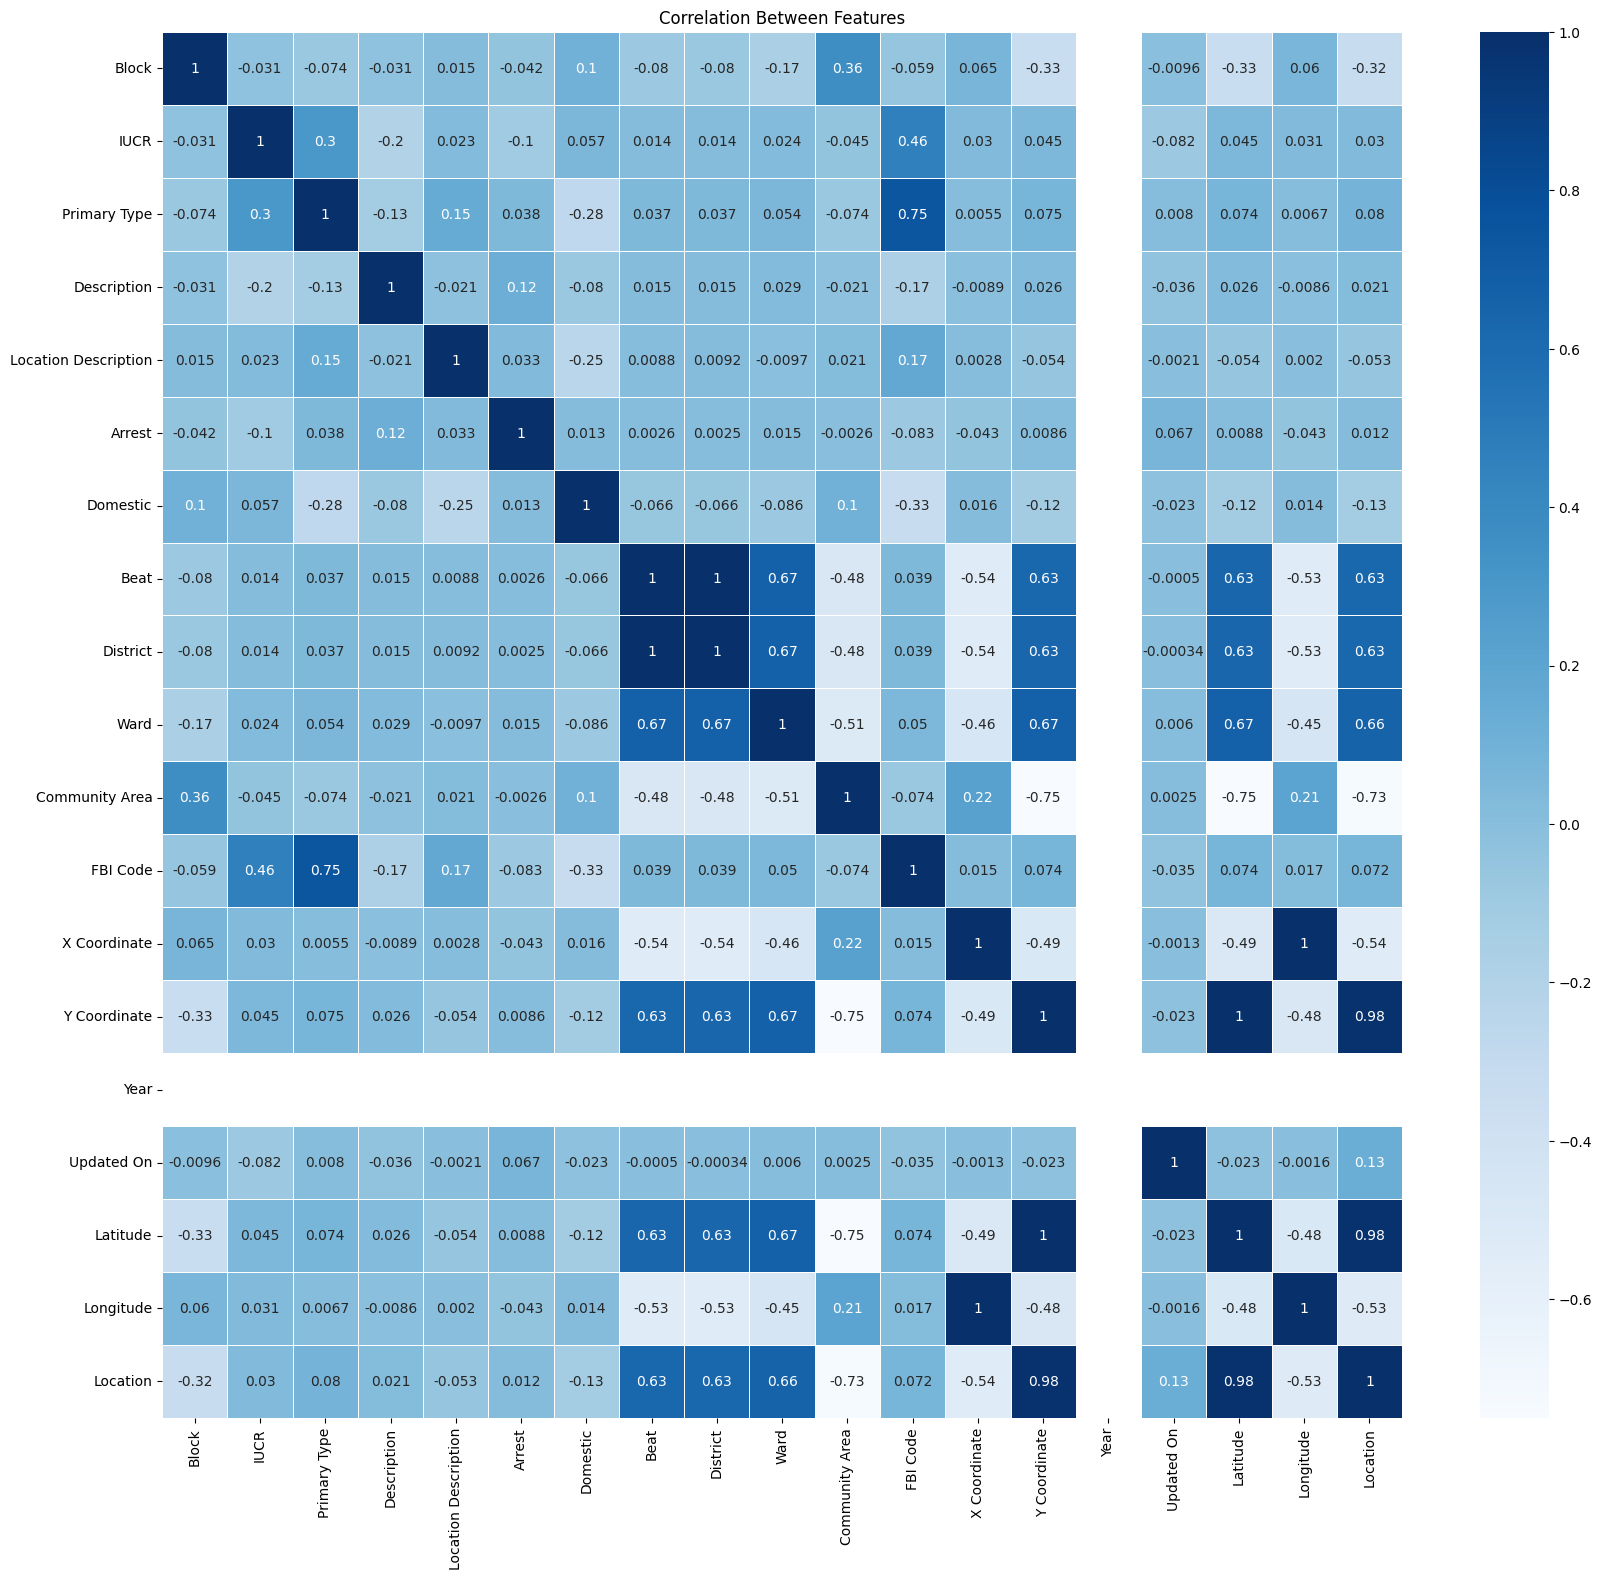

In [352]:
# Make Correlation Matrix to explore the correlation between features
plt.figure(figsize= (20, 18))
sns.heatmap( data = df.select_dtypes(include=np.number).corr() , annot = True , linewidth = 0.5 , cmap='Blues')
plt.title('Correlation Between Features')
plt.show()

In [ ]:
df = df.drop(columns=['Location','Block', 'Y Coordinate', 'X Coordinate','FBI Code', 'Beat','Updated On','Y ear'], axis=1)

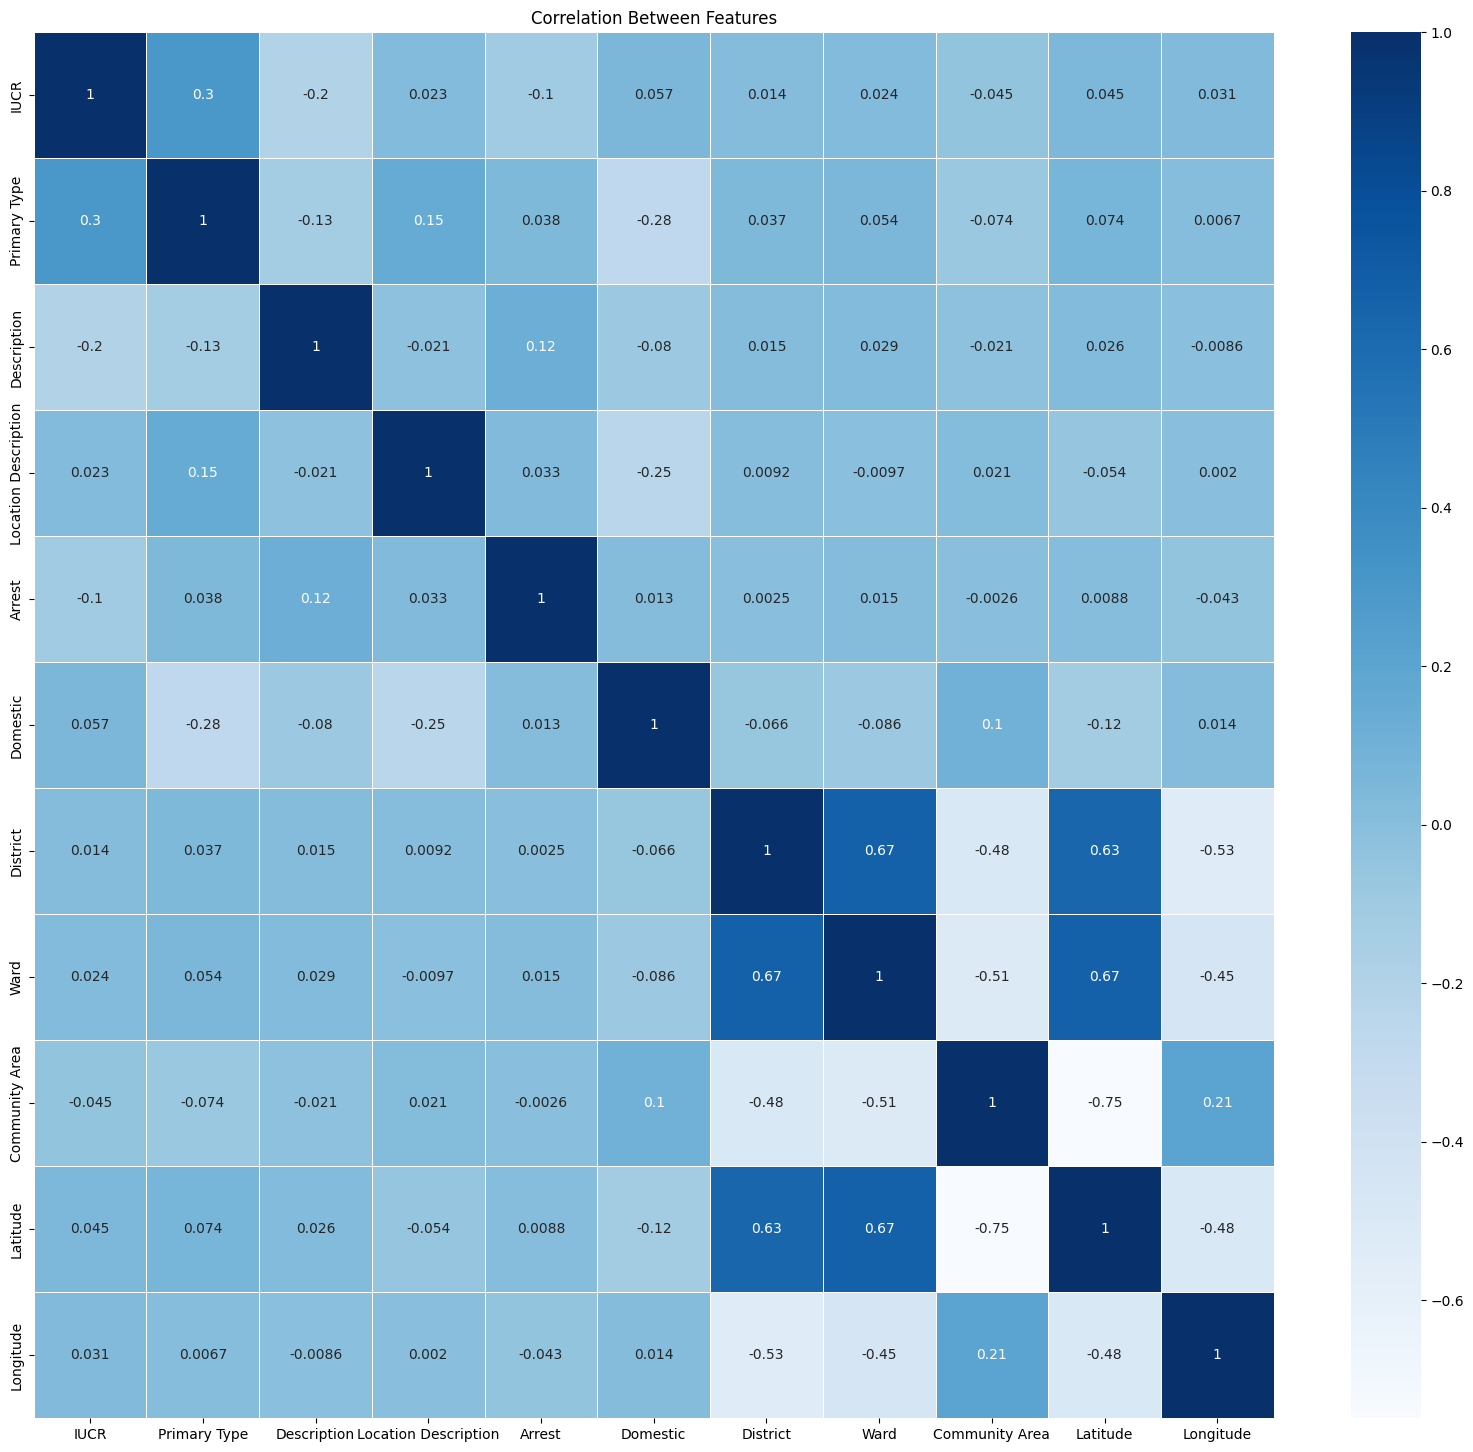

In [354]:
plt.figure(figsize= (20, 18))
sns.heatmap( data = df.select_dtypes(include=np.number).corr() , annot = True , linewidth = 0.5 , cmap='Blues')
plt.title('Correlation Between Features')
plt.show()

## Detecting Outliers

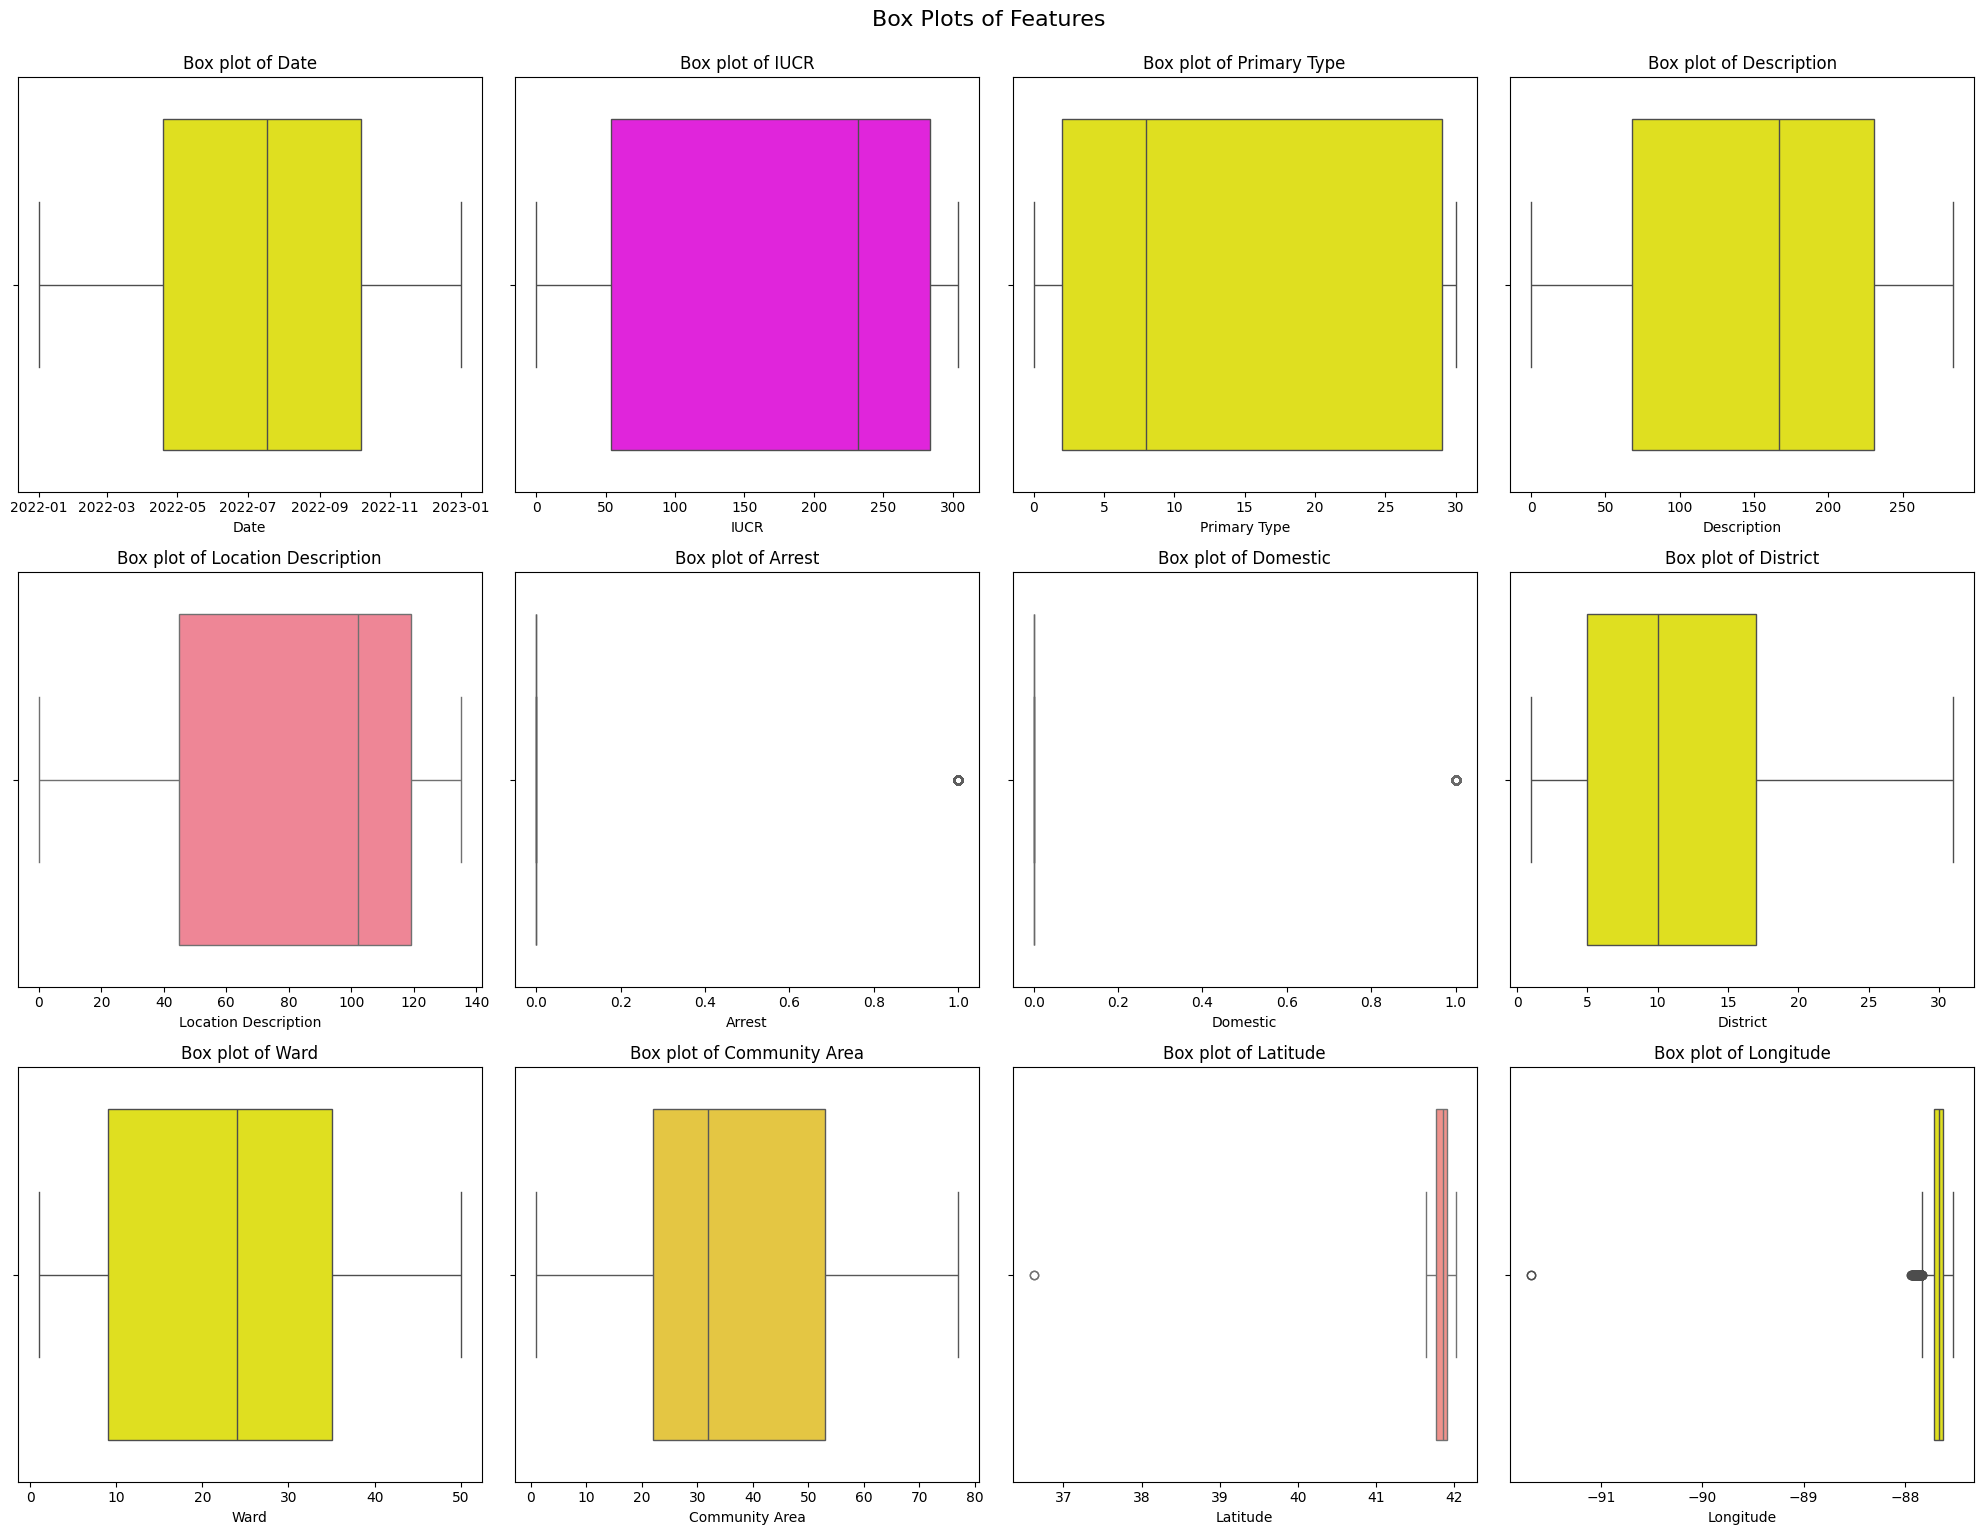

In [355]:
num_colors = 20
indices = np.linspace(0, 400, 1000, dtype=int)
np.random.shuffle(indices)
selected_indices = indices[:num_colors]
colors = [cm.spring(x) for x in selected_indices]
#Box Plot
def print_boxplot(df):
    n = len(df.columns)
    rows = int(np.ceil(n/4))

    fig, axs = plt.subplots(rows, 4, figsize=(20, 5*rows))

    # Flatten the axes array, to make iterating over it easier
    axs = axs.flatten()

    for i, (c, color) in enumerate(zip(df, colors)):
        sns.boxplot(x=df[c],color=color, ax=axs[i])
        axs[i].set_title(f'Box plot of {c}')

    # Remove any unused subplots
    if n % 4:
        for j in range(n, rows*4):
            fig.delaxes(axs[j])

    plt.tight_layout()
    plt.suptitle('Box Plots of Features', x=0.5, y=1.02, fontsize=16)
    plt.show()

print_boxplot(df)

## Feature Scaling

In [356]:
# Extract the datetime column
date_col = df['Date']

# Select the numerical columns (assuming these are the ones you want to scale)
numerical_cols = df.select_dtypes(include=[np.number])

# Create the scaler
scaler = MinMaxScaler()

# Scale the numerical columns
scaled_numerical_df = pd.DataFrame(scaler.fit_transform(numerical_cols), columns=numerical_cols.columns)

# (Optional) Transform the datetime column if needed (e.g., convert to timestamps)
# transformed_date_col = ...  # Your transformation logic here

# Combine the scaled/transformed columns back into a DataFrame
df = pd.concat([scaled_numerical_df, date_col], axis=1)

In [357]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239558 entries, 0 to 239557
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   IUCR                  239558 non-null  float64       
 1   Primary Type          239558 non-null  float64       
 2   Description           239558 non-null  float64       
 3   Location Description  239558 non-null  float64       
 4   Arrest                239558 non-null  float64       
 5   Domestic              239558 non-null  float64       
 6   District              239558 non-null  float64       
 7   Ward                  239548 non-null  float64       
 8   Community Area        239558 non-null  float64       
 9   Latitude              234891 non-null  float64       
 10  Longitude             234891 non-null  float64       
 11  Date                  239558 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(11)
memory usage: 21.9 MB


In [358]:
X = df.drop(['Date','Arrest'], axis=1)
y = df['Arrest']

## Getting Important Features From Random Forest Classifier

In [359]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split( X , y , test_size=0.2 , random_state=42 , stratify =y)

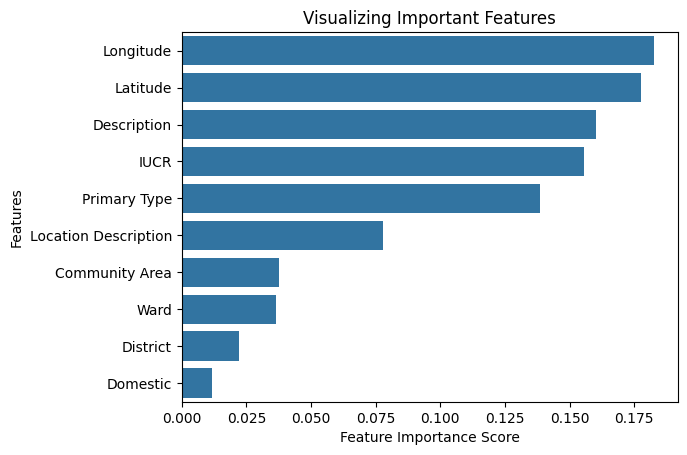

In [360]:
# instantiate the classifier 
rfc = RandomForestClassifier(random_state=0)

# fit the model
rfc.fit(X_train, y_train)

# Predict the Test set results
y_pred = rfc.predict(X_test)

feature_scores = pd.Series(rfc.feature_importances_, index=X_train.columns).sort_values(ascending=False)
sorted_features = feature_scores.index
sorted_scores = feature_scores.values
sns.barplot(x=feature_scores, y=feature_scores.index, orient = 'h')
# Add labels to the graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')

# Add title to the graph
plt.title("Visualizing Important Features")
sorted_features
# Visualize the graph
plt.show()